# Recommendation of tariffs

At our disposal data on customer behavior who have already switched to these tariffs.It is necessary to build a model for the classification task that will choose the right tariff.The data is already made.

The task is to build a model with the largest value *Accuracy *.It is necessary to bring the share of the correct answers to at least 0.75.* Accuracy* must be checked in a test sample.

## open and study the file

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os.path
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
try:
    path = os.path.join('/datasets/users_behavior.csv')
    data = pd.read_csv(path)
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [3]:
def first_view(data):
    title_lenght = 79
    title_one = 'Overview of the data of the first and last five rows'
    print('~' * int((title_lenght - len(title_one)) / 2), title_one, '~' * (title_lenght - len(title_one) - int((title_lenght - len(title_one)) / 2)))
    display(data.head(5))
    display(data.tail(5))
    print()
    title_two = 'General describe info'
    print('~' * int((title_lenght - len(title_two)) / 2), title_two, '~' * (title_lenght - len(title_two) - int((title_lenght - len(title_two)) / 2)))
    display(data.describe())
    print()
    title_three = 'Data type' 
    print('~' * int((title_lenght - len(title_three)) / 2), title_three, '~' * (title_lenght - len(title_three) - int((title_lenght - len(title_three)) / 2)))
    data.info()
    print()
    title_four = 'Missings'
    print('~' * int((title_lenght - len(title_four)) / 2), title_four, '~' * (title_lenght - len(title_four) - int((title_lenght - len(title_four)) / 2)))
    all_nulls = 0
    for col in data.columns:
       if data[col].isna().sum() > 0:
            all_nulls += 1
            print(f"{data[col].isna().sum()} missing values ​​in the column {col}. it's {round(data[col].isna().mean() * 100, 2)}%")
    if all_nulls == 0:
        print('There are no gaps in the data frame')
    print()
    title_five = 'Obvious duplicates'
    print('~' * int((title_lenght - len(title_five)) / 2), title_five, '~' * (title_lenght - len(title_five) - int((title_lenght - len(title_five)) / 2)))
    if data.duplicated().sum() > 0:
        print('Count of obvious duplicates - ', data.duplicated().sum())
    else:
        print('There is no Obvious duplicates in data frame')
    print()
    title_six = 'Histograms'
    print('~' * int((title_lenght - len(title_six)) / 2), title_six, '~' * (title_lenght - len(title_six) - int((title_lenght - len(title_six)) / 2)))
    data.hist(figsize = (8, 8));

~~~~~~~~~~~~~ Overview of the data of the first and last five rows ~~~~~~~~~~~~~~


,calls,minutes,messages,mb_used,is_ultra
0,40.00,311.90,83.00,19915.42,0
1,85.00,516.75,56.00,22696.96,0
2,77.00,467.66,86.00,21060.45,0
3,106.00,745.53,81.00,8437.39,1
4,66.00,418.74,1.00,14502.75,0


,calls,minutes,messages,mb_used,is_ultra
3209,122.00,910.98,20.00,35124.90,1
3210,25.00,190.36,0.00,3275.61,0
3211,97.00,634.44,70.00,13974.06,0
3212,64.00,462.32,90.00,31239.78,0
3213,80.00,566.09,6.00,29480.52,1



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ General describe info ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,calls,minutes,messages,mb_used,is_ultra
count,3214.00,3214.00,3214.00,3214.00,3214.00
mean,63.04,438.21,38.28,17207.67,0.31
std,33.24,234.57,36.15,7570.97,0.46
min,0.00,0.00,0.00,0.00,0.00
25%,40.00,274.58,9.00,12491.90,0.00
50%,62.00,430.60,30.00,16943.24,0.00
75%,82.00,571.93,57.00,21424.70,1.00
max,244.00,1632.06,224.00,49745.73,1.00



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Data type ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Missings ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
There are no gaps in the data frame

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Obvious duplicates ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
There is no Obvious duplicates in data frame

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Histograms ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


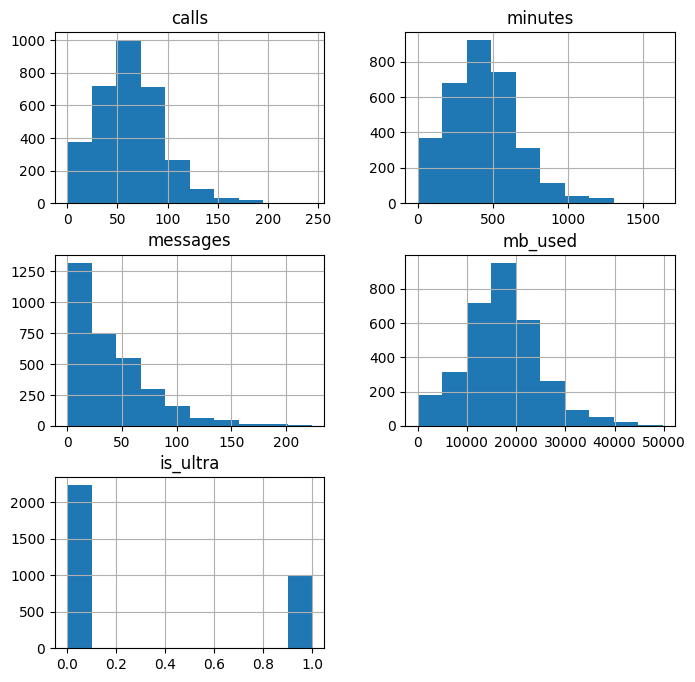

In [4]:
first_view(data)

`Calls` and` Minutes' graphs are very similar in shape, let's look at the correlation

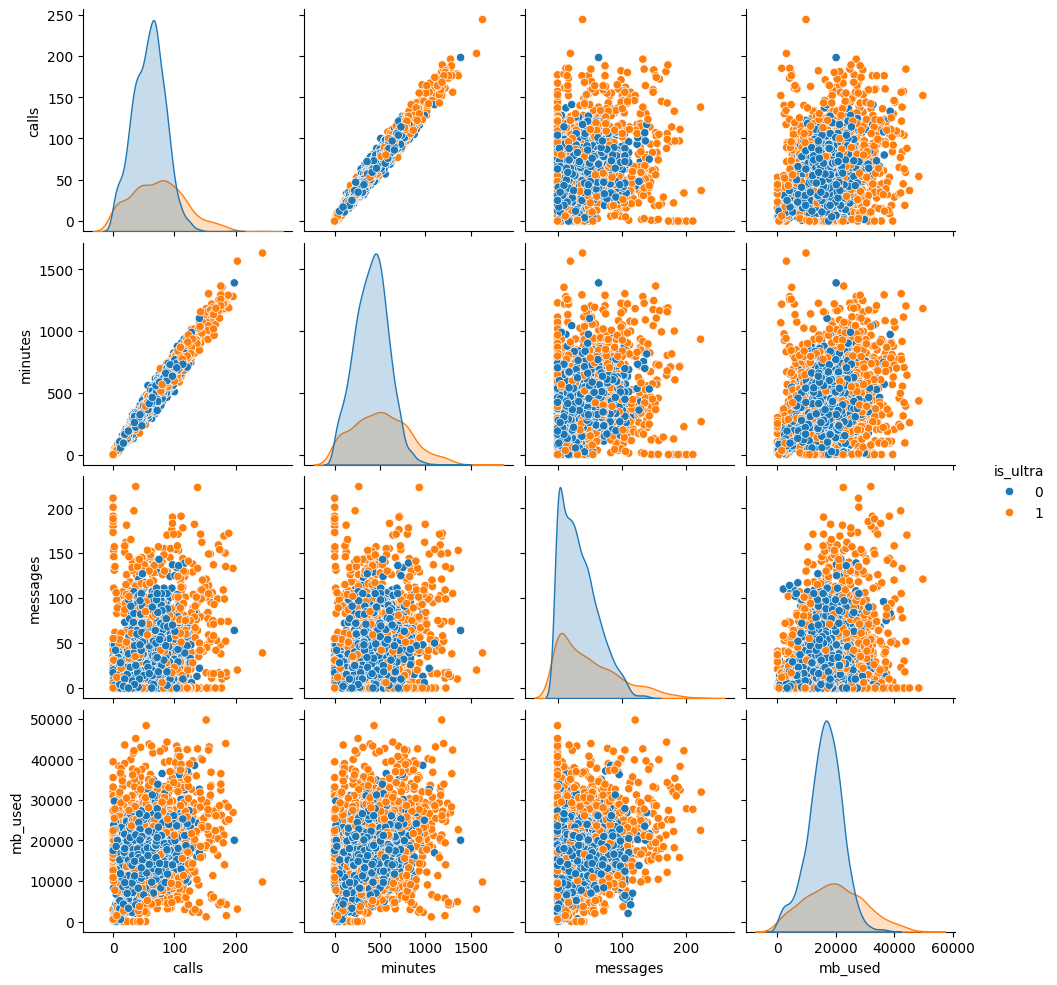

In [5]:
sns.pairplot(data, hue='is_ultra');

In [6]:
data['minutes'].corr(data['calls'])

0.9820832355742293

In features, `Calls` and` Minutes` there is a clear multicollinearity.Remove one of the signs to eliminate the problem

In [7]:
data = data.drop('minutes', axis=1)
data.head()

,calls,messages,mb_used,is_ultra
0,40.00,83.00,19915.42,0
1,85.00,56.00,22696.96,0
2,77.00,86.00,21060.45,0
3,106.00,81.00,8437.39,1
4,66.00,1.00,14502.75,0


Further data is really not required, there are no passes and duplicates, there are no other problems either

## pure data for samples

In [8]:
features = data.drop('is_ultra', axis=1)
target = data['is_ultra']

features_train, features_valid_n_test, target_train, target_valid_n_test = train_test_split(
    features, target, test_size=0.4, random_state=1337)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid_n_test, target_valid_n_test, test_size=0.5, random_state=1337)

print('Shape of the training set:')
print(f'features {features_train.shape};')
print(f'target {target_train.shape}')
print(f"it's {round((target_train.count() / target.count()) * 100)}% of dataset")
print()
print('Shape of the validation set:')
print(f'features {features_valid.shape};')
print(f'target {target_valid.shape}')
print(f"it's {round((target_valid.count() / target.count()) * 100)}% of dataset")
print()
print('Shape of the test set:')
print(f'features {features_test.shape};')
print(f'target {target_test.shape}')
print(f"it's {round((target_test.count() / target.count()) * 100)}% of dataset")

Shape of the training set:
features (1928, 3);
target (1928,)
it's 60% of dataset

Shape of the validation set:
features (643, 3);
target (643,)
it's 20% of dataset

Shape of the test set:
features (643, 3);
target (643,)
it's 20% of dataset


## We Expect Models

### The decisive tree

In [9]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 6):
	model = DecisionTreeClassifier(random_state=1337, max_depth=depth)
	model.fit(features_train, target_train)
	result = model.score(features_valid, target_valid)
	if result > best_result:
		best_model = model
		best_result = result
		best_depth = depth
        
print("Accuracy of best model:", best_result, "with max_depth =", best_depth)

Accuracy of best model: 0.7853810264385692 with max_depth = 3


We checked the model built according to the decisive tree algorithm with a depth of 1 to 5, the best result in the valdate sample of the Dalamodel with a depth of 3, the accuracy was 78.5%.This is not a bad result, but you should look at other algorithms

## RandomForestClassifier

We will drive out different options for depth parameters through the cycle, as they did with the decisive tree

In [10]:
best_model = None
best_result = 0
best_est = 0
for est in range(10, 201, 10):
    model = RandomForestClassifier(random_state=1337, n_estimators=est)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

print("Accuracy of best model:", best_result, "with n_estimators =", best_est)

Accuracy of best model: 0.7947122861586314 with n_estimators = 90


The Results turned out to be close to the decisive tree, a gap of only 1%, the result of 79.5%.Although the random forest should show the results much better.We will use the Gridsearchcv method to search for optimal parameters.In this case, there are many parameters and it will be easier than to drive them all through the cycle to search for optimal.

In [11]:
features_frames = [features_train, features_valid]
target_frames = [target_train, target_valid]

features_for_grid = pd.concat(features_frames)
target_for_grid = pd.concat(target_frames)

print('Shape of the cross-validation set:')
print(f'features {features_for_grid.shape};')
print(f'target {target_for_grid.shape}')
print(f"it's {round((target_for_grid.count() / target.count()) * 100)}% of dataset")
print()

Shape of the cross-validation set:
features (2571, 3);
target (2571,)
it's 80% of dataset



In [16]:
model = RandomForestClassifier()

parametrs = { 
    'random_state' : [1337],
    'n_estimators': range(110, 141, 10),
    'max_depth': range(10, 13),
    'min_samples_leaf': range(1,3),
    'min_samples_split': range(6,13,2) 
    }

grid = GridSearchCV(model, parametrs, scoring='accuracy', cv=5)
grid.fit(features_for_grid, target_for_grid)

print(grid.best_params_)
print()
print(grid.best_score_)

{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 130, 'random_state': 1337}

0.8078636998980014


The model built according to the random forest algorithm showed with the Gridsearchcv found with the help of Gridsearchcv even better than our first attempts to use it with the selection of parameters using the cycle.Gridsearchcv coped well with the task.

### LogisticRegression

In [17]:
model = LogisticRegression(random_state=1, solver='lbfgs', max_iter=1000) 
model.fit(features_train, target_train) 
predict = model.predict(features_valid)
accuracy = model.score(features_valid, target_valid)

print("Accuracy of model:", round(accuracy, 4))

Accuracy of model: 0.7341


Logistic regression, the 'LBFGS' algorithm is one of the most common, the result is 70.4%.
This is definitely not suitable for us against the background of previous models

The model of random forests best managed, we will leave it.In second place, a decisive tree with a small margin, is also not a bad result, and if you need to focus on the speed of work with accuracy, then the option does not cope poorly.Logistic regression did the worst of all, although it works quickly, but the quality is bad.

## Check the model on test set

So, based on our study, the best result was shown by the model built on an algorithm of random wood with 30 trees, a depth of 11, the minimum number of samples in the sheets and the number of samples for a split of 6. We check it in a test sample.

In [23]:
model = RandomForestClassifier(random_state=grid.best_params_['random_state'], 
                               n_estimators=grid.best_params_['n_estimators'], 
                               max_depth=grid.best_params_['max_depth'], 
                               min_samples_leaf=grid.best_params_['min_samples_leaf'], 
                               min_samples_split=grid.best_params_['min_samples_split'])

model.fit(features_train, target_train)

predict = model.predict(features_test)
accuracy = model.score(features_test, target_test)

print("Accuracy of model:", round(accuracy, 4))

Accuracy of model: 0.8336


The model in the test sample shows the result better than on the validation, the accuracy of more than 83%

## We will check the model for adequacy

We will train the model in the most common parameters, to compare our model with it

In [24]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=1337)
dummy_clf.fit(features_train, target_train)
dummy_clf.predict(features_test)
dummy_accuracy = dummy_clf.score(features_test, target_test)

if accuracy > dummy_accuracy:
    print(f'Accuracy of our model ({round(accuracy, 4)}) '
    f'higher than in the model of selection of the most frequently encountered parameters '
    f'({round(dummy_accuracy, 4)}), our model is adequate')
else:
    print(f'Accuracy of our model ({round(accuracy, 4)}) '
    f'lower than in the model of selection of the most frequently encountered parameters '
    f'({round(dummy_accuracy, 4)}), our model not adequate')

Accuracy of our model (0.8336) higher than in the model of selection of the most frequently encountered parameters (0.7045), our model is adequate


Having examined the metrics of models, we can conclude that our model gives results higher than a simple guess on the basis of the most chat answers that would give a result of 70% of the correct answers

In [25]:
precision = precision_score(target_test, predict)
recall = recall_score(target_test, predict)
f1 = 2 * precision * recall / (precision + recall)

print(f'precision = {precision}')
print(f'recall = {recall}')
print(f'f1 = {f1}')

precision = 0.7643312101910829
recall = 0.631578947368421
f1 = 0.69164265129683


# Conclusion

The data obtained are divided into three samples:

- training, 
- validation
- testing 

with proportions of 60-20-20.

A study of 3 types of models with different sets of hyperparameters trained in the training sample was carried out.

Model with the best metric of the correct answers in 80.5% on a validation sample was highlighted.

This is a model of `RandomForest` with the parameters founded using `GridSearchCV`.

This model was tested in a test sample and showed a good result of 83%, which exceeded the results on the validation sample. The obtained model went through an adequate test and will be able to effectively help in determining the transition to the tariff depending on the user data.